<a href="https://colab.research.google.com/github/alexandragrecu/Bark-and-Purr/blob/master/Fake_News_Detection_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📰 Fake News Detection**
## NLP 2 Course - February 2023

### Students: 
  - Alexandra Grecu (506 - Software Engineering)
  - Ioana Ciripan (507 - Artificial Intelligence)


### Info:
- The documentation for this project can be found [here](https://docs.google.com/document/d/1WSkcLyB5S4-Ud3sMG59aUm52127P7_FUsf5AnE5dIK0/edit?usp=sharing).
- The powerpoint presentation for this project can be found [here](https://drive.google.com/drive/folders/1_nUrRDslIPVm6YA991LjcumCCm6mnP1y?usp=share_link).
---



# **1. 📖 Introduction**

Fake news is a term used to describe **misinformation** or **false information** that is spread deliberately to deceive people. This type of news has become increasingly prevalent in recent years, particularly with the rise of social media. Fake news can take many forms, from **fabricated stories** to **manipulated images and videos**. It can be used for political gain, to spread misinformation about public health, or to promote conspiracy theories. It is important to be able to identify fake news and fact-check information before sharing it.

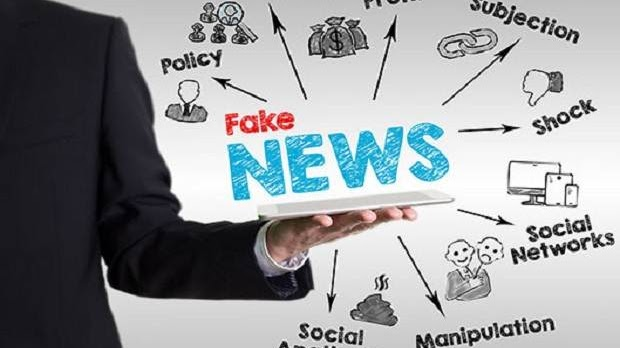

Fake news is a serious problem that can have **real-world consequences**. It can lead to the spread of misinformation and mistrust in institutions, and can even incite violence or harm. It can also have an impact on democracy, as it can be used to manipulate public opinion and influence elections. In addition, it can be used to promote harmful or dangerous products, or to scam people out of their money. The rise of fake news has led to calls for greater media literacy and for social media platforms to take responsibility for curbing the spread of misinformation. However, it's also important for individuals to take responsibility for the information they consume and share by developing critical thinking skills, and verifying the information they come across.

------


## **2. 🎯 The purpose of this project**
The aim of this project is to design and implement a comprehensive system for detecting fake news using a combination of Natural Language Processing and Machine Learning methods. The goal is to create a model that can accurately identify misinformation in news content and help combat the spread of fake news.

We will implement the following procedures:

**2.1** We will use advanced **pre-processing techniques**: NLP techniques such as **tokenization**, **stemming**, and **removing stop words** can help improve the performance of the model. 

**2.2** We will use a variety of machine learning algorithms: Experiment with different **machine learning algorithms**, such as **supervised classification algorithms**, **deep learning models**, and **ensemble methods**. Then, we will compare the performance of different models to determine which one works best for your dataset.

**2.3** We will incorporate additional features: In addition to the text, we can also use other features such as the **source of the article**, **the date it was published**, and the number of shares or likes on social media to improve the performance of the model.

**2.4** We will use a combination of approaches: We will use the approach of **fact-checking** using BERT, analyzing the source of the information, and evaluating the credibility of the author or publisher to improve the performance of the model.



##  **3. 💾 The DataSet**
The dataset in question contains a substantial collection of American news articles, numbering around **6400**, which were published in the year 2017. 

Each entry in the dataset consists of two key components, the title or headline of the news article and the initial segment or fragment of the article. This dataset provides a comprehensive overview of American news from the specified year, giving insights into the events, happenings and trends of that time.

You can find a copy of the dataset [here](https://github.com/alexandragrecu/fake-news-detection-system/blob/main/fake_or_real_news.csv).

------

## 4. **🚀 Fake News Detection Project:** 

## **1. 📚 Import packages**

In [ ]:
!pip install colorama
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn import svm

from google.colab import files

from wordcloud import WordCloud
from functools import reduce

from nltk import word_tokenize
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import re
import string

import itertools

from colorama import Fore
from colorama import Style

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


-----------

## **2. 🗃️ Functions and variables used in our analysis**
In this section, we will define all the variables and functions we need in our project:

----

### **Variables:**

In [ ]:
# color palette used for charts
colors = ['#F55C7A', '#F57C73', '#FFBABA', '#F68C70', '#F6AC69',
          '#F6BC66', "#C89566", '#927071', '#A5888A', '#DAA095', '#D49BA7']

-----

### **Functions for preprocessing the news:**



In [ ]:
# Initialize the stemmer
stemmer = PorterStemmer()

In [ ]:
# Define a function to stem the words in a sentence
def stem_sentence(sentence):
  '''Return the sentence after the stemming transformation'''
  
  stemmed_words = [stemmer.stem(word) for word in sentence.split()]
  return ' '.join(stemmed_words)

In [ ]:
def preprocess_text2(df, col):
  '''
  Return a new dataframe with the the column col processed.
  '''
  
  # Removes all hashtags and mentions (usernames preceded by '@')
  df[col] = df[col].str.translate(str.maketrans('', '', string.punctuation))
  
  # Removing hashtags and mentions
  df[col] = df[col].apply(lambda x: re.sub(r'(@\w+)|(#\w+)', '', x))

  # lower
  df[col] = df[col].str.lower()

  # stemming
  df[col] = df[col].apply(stem_sentence)
  
  return df

-----

### **Functions for plotting:**


In [ ]:
def create_dataframe(df, col):
  '''
  Create a dataframe obtained by grouping the number of news in the 'df' dataframe 
  based on the 'col' variable. This newly created dataframe will be used in the
  plotting functions.
  '''
  
  temp = pd.DataFrame(df[col].value_counts().reset_index())
  temp.columns = [col, 'no_news']
  temp['percent'] = round(temp['no_news'] / df.shape[0] * 100, 2)

  return temp

In [ ]:
def plot_cat_vars(x_column, data, title, xlabel, total, kind,
                     fig_size=(14,8), y_column='no_news', 
                     ylabel='Number of News', legend=False, order=True):
  '''
  Plot the charts for categorical variables. 
  '''

  fig, ax = plt.subplots(figsize=fig_size)
  ax.tick_params(axis='both', labelsize=14)

  
  ax = sns.barplot(x=x_column, 
                    y=y_column, 
                    data=data, 
                    palette=colors)
 

  for p in ax.patches:
      x=p.get_bbox().get_points()[:,0]
      y=p.get_bbox().get_points()[1,1]
      ax.annotate('{:.2f}%'.format((p.get_height()/total)*100), (x.mean(), y), 
                  ha='center',
                  va='bottom', 
                  size=12, 
                  fontsize=15)

  plt.title(title, 
            fontdict={'fontsize' : 23}, 
            pad=10)
  plt.xlabel(xlabel,
             fontsize=15)
  plt.ylabel(ylabel
             ,fontsize=15)


  sns.despine()

  plt.show() 

In [ ]:
def plot_confusion_matrix(y, y_pred, classifier_name):
  '''
  Plot the confusion matrix for every classifier used 
  '''
  cf_matrix = confusion_matrix(y, y_pred)
  
  plt.figure(figsize=(6.22,6.22))

  g = sns.heatmap(cf_matrix / np.sum(cf_matrix), 
              fmt='.2%',
              annot=True,
              cmap='Blues')
  
  g.set(title=f'Confusion matrix for the {classifier_name} classifier',
        xlabel='Predicted label',
        ylabel='Actual label')
  
  plt.show()


-----

### **Functions - Machine Learning Classifiers:**


In [ ]:
def get_params(penalty, C, random_state):
  return {
      "penalty": penalty,
      "C": C,
      "random_state": random_state
  }

In [ ]:
def print_metrics(a, p, r):
  '''Print the metrics.'''
  
  print("Accuracy:", a)
  print("Precision:", p)
  print("Recall:", r)

In [ ]:
def get_logistic_regression_clf(params, data):
  '''Logistic regression classifier'''
  
  X_train, X_test, y_train, y_test = data
  # Train a logistic regression
  log_reg = LogisticRegression(**params, max_iter=1000).fit(X_train, y_train)

  # Predict the labels
  y_predicted = log_reg.predict(X_test)

  # plot the confusion matrix
  plot_confusion_matrix(y_test, y_predicted, 'Logistic Regression')

  # plot RocCurve
  RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
  
  return get_metrics(y_predicted, y_test)

In [ ]:
def get_naive_bayes_clf(data):
  '''Naive Bayes Classifier'''
  
  X_train, X_test, y_train, y_test = data

  clf = MultinomialNB()
  clf.fit(X_train, y_train)

  # Predict the labels
  y_predicted = clf.predict(X_test)

  # plot the confusion matrix
  plot_confusion_matrix(y_test, y_predicted, 'Naive Bayes')

  # plot RocCurve
  RocCurveDisplay.from_estimator(clf, X_test, y_test)

  return get_metrics(y_predicted, y_test)

In [ ]:
def hyperparameter_tuning_dt(data):
  '''hyperparameter tuning fo decisional trees with random search'''

  X_train, X_test, y_train, y_test = data

  rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
  }

  clf = DecisionTreeClassifier(random_state=123)

  clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  
    n_iter=5, 
    verbose=2,  
    random_state=123,
  )
  clf_rs.fit(X_train, y_train)

  return (clf_rs.best_params_, clf_rs.best_score_)

In [ ]:
def get_decision_tree_clf(data):
  '''Decision tree classifier'''
  
  params, score = hyperparameter_tuning_dt(data)

  X_train, X_test, y_train, y_test = data

  clf = DecisionTreeClassifier(**params)
  clf = clf.fit(X_train, y_train)

  # Predict the labels
  y_predicted = clf.predict(X_test)

  # plot the confusion matrix
  plot_confusion_matrix(y_test, y_predicted, 'Decision Tree')

   # plot RocCurve
  RocCurveDisplay.from_estimator(clf, X_test, y_test)

  metrics = get_metrics(y_predicted, y_test)
  best_params = params
  
  return (metrics, params)

In [ ]:
def hyperparameter_tuning_svm(data):
  '''hyperparameter tuning for SVM'''
  
  X_train, X_test, y_train, y_test = data

  rs_param_grid = {
    "kernel": ["linear", "poly", "sigmoid"],
    "C": [0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1],
  }

  
  clf = svm.SVC(random_state=123)

 
  clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=2, 
    n_iter=2, 
    verbose=2, 
    random_state=123,
  )

  # Train the model on the training set
  clf_rs.fit(X_train, y_train)

  return (clf_rs.best_params_, clf_rs.best_score_)

In [ ]:
def get_svm_clf(data):
  '''SVM classifier'''
  
  params, score = hyperparameter_tuning_svm(data)

  X_train, X_test, y_train, y_test = data

  clf = svm.SVC(random_state=123)
 
  clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    cv=2,  
    n_iter=2,
    verbose=2,  
    random_state=123,
  )

  clf = clf.fit(X_train, y_train)

  # Predict the labels
  y_predicted = clf.predict(X_test)

  # plot the confusion matrix
  plot_confusion_matrix(y_test, y_predicted, 'SVM')

  # plot RocCurve
  RocCurveDisplay.from_estimator(clf, X_test, y_test)

  metrics = get_metrics(y_predicted, y_test)
  best_params = params
  return (metrics, params)

In [ ]:
def get_metrics(y_predicted, y_test):
  '''Return the accuracy, precision and recall scores.'''

  return (accuracy_score(y_test, y_predicted), precision_score(y_test, y_predicted), recall_score(y_test, y_predicted))

In [ ]:
def get_results(data):
  '''
    Return a dataframe that includes metrics such as accuracy,
    precision, recall, as well as the top performing parameters.
    
    We used 4 classifiers: Logistic Regression, Naive Bayes, 
    Decision Tree and SVM classifiers
  '''

  # logistic regression classifier
  accuracy_lr, precision_lr, recall_lr = get_logistic_regression_clf({ "penalty": "l2",
                                                                      "C": 1,
                                                                      "random_state": 123},
                                                                       data)
  accuracy_lr2, precision_lr2, recall_lr2 = get_logistic_regression_clf({ "penalty": "l2", 
                                                                         "C": 100, 
                                                                         "random_state": 123},
                                                                        data)
  # naive bayes classifier
  accuracy_nb, precision_nb, recall_nb = get_naive_bayes_clf(data)
  
  # decision tree classifier
  metrics_dt, best_params_dt = get_decision_tree_clf(data)
  accuracy_dt, precision_dt, recall_dt = metrics_dt

  # SVM classifier
  metrics_svm, best_params_svm = get_svm_clf(data)
  accuracy_svm, precision_svm, recall_svm = metrics_svm
 
  results = {
    "classifier": ["Logistic Regression C=1", 
                   "Logistic Regression C=100", 
                   "Naive Bayes", "Decisional Tree", 
                   "SVM"],
    "accuracy": [accuracy_lr, accuracy_lr2, accuracy_nb, accuracy_dt, accuracy_svm],
    "precision": [precision_lr, precision_lr2, precision_nb, precision_dt, precision_svm],
    "recall": [recall_lr, recall_lr2, recall_nb, recall_dt, recall_svm], 
    "best_params": [np.nan, np.nan, np.nan, best_params_dt, best_params_svm]
    }

  return pd.DataFrame(results)

-----

### **Functions for transforming the data (using TF-IDF vectorizer):**


In [ ]:
def prepare_data(X): 
  '''
  Returns the data in a dataframe format after we used TF-IDF vectorizer

  TF-IDF is a method used to determine the importance of a word in a document 
  or set of documents. It is calculated by multiplying the term frequency (TF)
  of a word in a document by the inverse document frequency (IDF) of the word 
  across all documents in the corpus. 

  It will help us to identify the words that are unique and important to a 
  specific document among a set of documents.
  '''
  
  y = news['label']
 
  # Create training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
 
  # Create a TfidfVectorizer instance + eliminate stop words for english language
  tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, min_df=15)

  # Transform the training data
  tfidf_train = tfidf_vectorizer.fit_transform(X_train)

  # Transform the test data:
  tfidf_test = tfidf_vectorizer.transform(X_test)

  # return a tuple of info about training and testing sets
  return (tfidf_train, tfidf_test, y_train, y_test)

----------------

# **3. 💾 Upload the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
news = pd.read_csv('train.csv')

In [ ]:
news.shape

(20800, 5)

🟩  The raw dataset has 20,800 news items and the information about them is stored in the following variables:

- `id`: unique id for a news article

- `title`: the title of a news article

- `author`: author of the news article

- `text`: the text of the article; could be incomplete

- `label`: a label that marks the article as potentially unreliable
 - 0: unreliable
 
 - 1: reliable


In [ ]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1




---

---





---



---



## **Examples of true and fake news**

In [ ]:
print(f"{Fore.GREEN}EXAMPLE OF REAL NEWS:\n")
print(f"Title: \n{news.iloc[0, 2]}\n")
print(f"Author: \n{news.iloc[0, 1]}\n")
print(f"Article:\n{news.iloc[0, 3][0:500]}:{Style.RESET_ALL}\n\n\n")

print(f"{Fore.BLUE}EXAMPLE OF FAKE NEWS:\n")
print(f"Title: \n{news.iloc[1, 2]}\n")
print(f"Author: \n{news.iloc[1, 1]}\n")
print(f"Article:\n{news.iloc[1, 3][0:500]}:{Style.RESET_ALL}")

EXAMPLE OF REAL NEWS:

Title: 
Darrell Lucus

Author: 
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It

Article:
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It t:



EXAMPLE OF FAKE NEWS:

Title: 
Consortiumnews.com

Author: 
Why the Truth Might Get You Fired

Article:
Why the Truth Might Get You Fired October 29, 2016 
The tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Ir


The subsequent step in this process involves cleaning and verifying the accuracy of the data:

-------------
# **4. 🧹 Cleaning the data**
- Do we have any missing values in the dataset?
- We will eliminate the first column of the dataset

In [ ]:
news.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
news = news.dropna()
news.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
news_copy = news.copy()

In [ ]:
news.shape

(18285, 5)

🟩 In this step, we examined the dataset for missing values and discovered that there were 558 missing values in the "title" column, 1957 missing values in the "author" column, and 39 missing values in the "text" column. Given the size of the dataset at 20,800 news articles, we determined that it was appropriate to remove all null values from the dataset.
Removing the missing values, we were left with 10361 instances of fake news and 7924 instances of real news.


## **5. ❓ Asking questions: How many real and fake news do we have in the dataset?**

In [ ]:
df = create_dataframe(news, 'label')
df

,label,no_news,percent
0,0,10361,56.66
1,1,7924,43.34


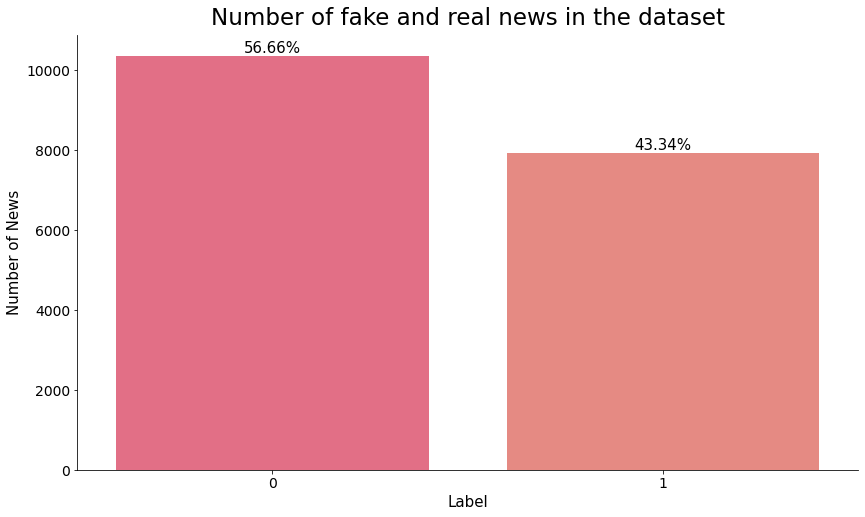

In [ ]:
plot_cat_vars(x_column='label',
              data=df, 
              total=news.shape[0],
              kind='bar',
              title='Number of fake and real news in the dataset',
              xlabel='Label')

Out of the 6335 news articles, half are authentic and the other half are fabricated, which is a good balance for our dataset.


## **6. ❓ Asking questions: What words occur most frequenly in fake news?**

In [ ]:
fake_news = news[news.label == 0]['text'][:10]
fake_news = reduce(lambda a, b: a + b, fake_news)
fake_news

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

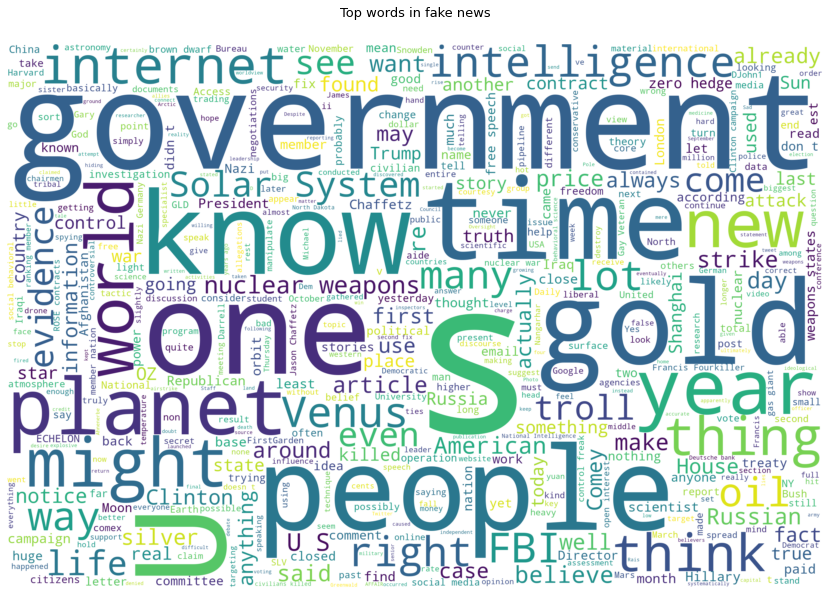

In [ ]:
stop_words = set(stopwords.words("english"))
fake_news = fake_news.split()
fake_news = [word for word in fake_news if word.lower() not in stop_words]
fake_news = ' '.join(fake_news)

word_cloud_fake_news = WordCloud(background_color="white",
                                 width=3000, height=2000, max_words=500).generate(fake_news)

plt.figure(figsize=(15, 10))
plt.title("Top words in fake news", y=1.04, size=13) 
plt.axis("off") 
plt.imshow(word_cloud_fake_news, interpolation="bilinear")

plt.show()

❗ Unfortunately, simply identifying the most commonly used words in relation to fake news does not provide us with a complete understanding of the issue. However, it can help us to identify the main topics associated with fake news and in many cases, it appears that these topics are politically related.

---------------
## **7. 🔨 Text pre-processing**
In this step, the following procedures will be carried out:

- tokenization: segmenting text into individual words
- stemming: reducing words to their root form
- eliminating the use of emoticons
- converting all words to lowercase
- eliminating the use of punctuation
- eliminating stop words

In [ ]:
# tokenize
word_tokens = [word_tokenize(text) for text in news.text]

# create a new feature for the length of each text
news['no_words'] = [len(word_tokens[i]) for i in range(len(word_tokens))]

news.head()

,id,title,author,text,label,no_words
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,943
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,822
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1454
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,612
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,177


In [ ]:
index_no_words_0 = news[news['no_words'] == 0].index
news.drop(index_no_words_0, inplace=True)

# check
assert news.no_words.nsmallest().sum() != 0

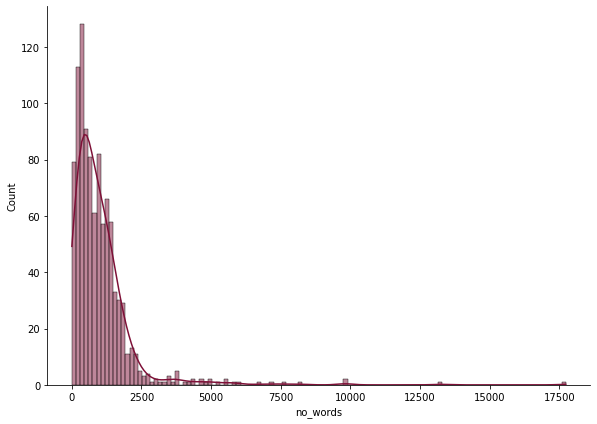

In [ ]:
# ploting a histogram
sns.displot(x='no_words', data=news, kind='hist', kde=True, height=6,
            color='#7E1037', aspect=1.4, bins=120)
plt.show()

❗The histogram of the number of words per news item shows a right-skewed distribution. This is likely due to the presence of large values (cases where one or a few points are much larger than the majority of the data). To address this issue, we will use a logarithmic scale.

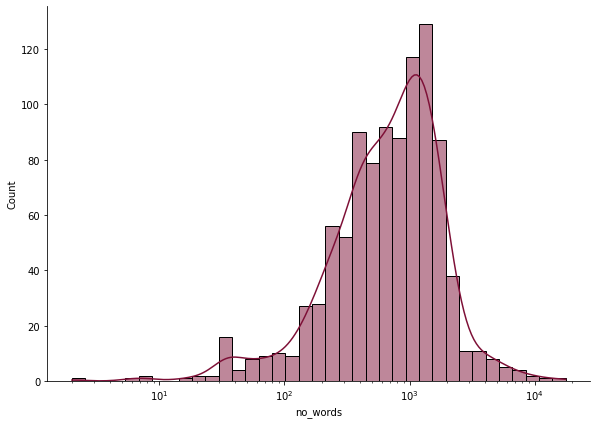

In [ ]:
sns.displot(x='no_words', data=news, kind='hist', kde=True, height=6,
            color='#7E1037', aspect=1.4, log_scale=True)
plt.show()

The histogram indicates a distribution that is not normal, however, there is a notable concentration of values on the left side, which can be considered as a left-skewed distribution.

------
# **8.〽️ Classify the News**
Here, we plan to explore various machine learning techniques, including supervised classification algorithms. The aim is to evaluate the performance of different models and determine the one that is best suited for your data.

The text is classified using four algorithms: 
- Logistic Regression, 

- Naive Bayes, 

- Decision Tree, 

- SVM.




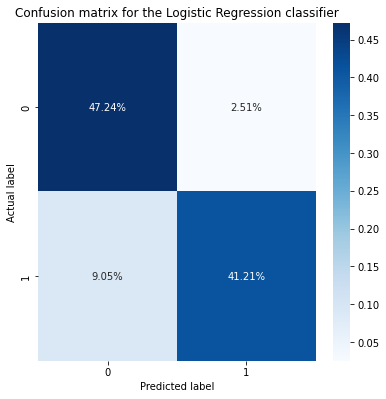

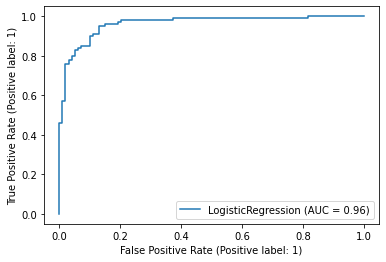

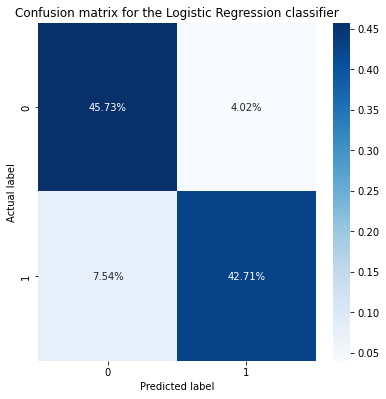

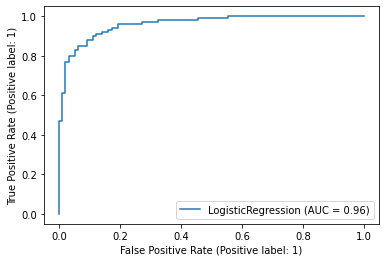

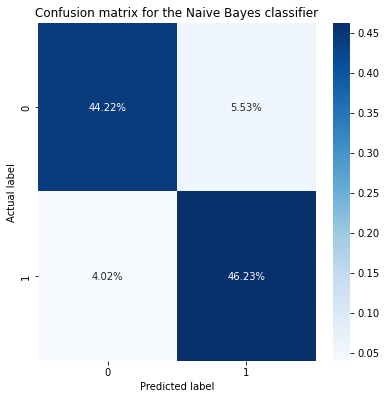

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END

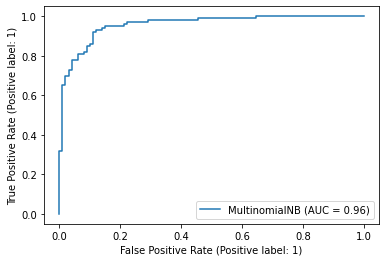

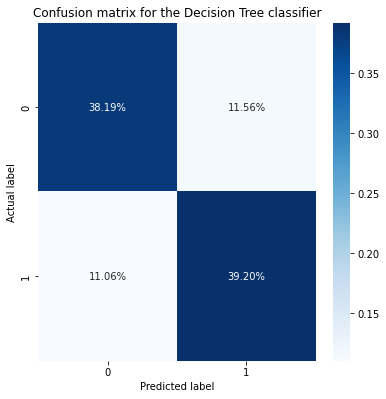

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.5s


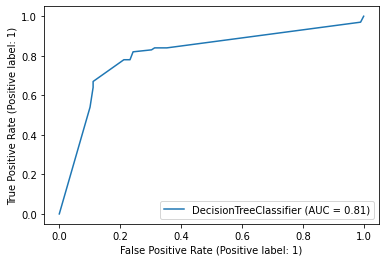

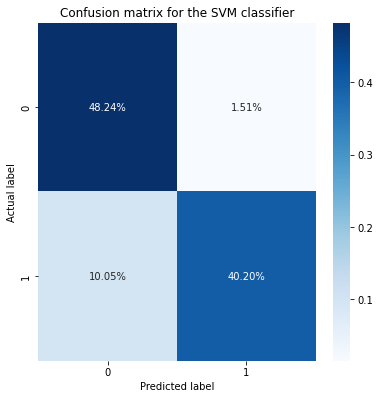

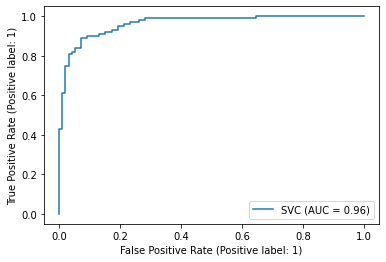

In [ ]:
# 1. data is not processed and we consider just the text as input
X = news.text
data = prepare_data(X)
results1 = get_results(data)

In [ ]:
results1

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.884422,0.942529,0.82,NaN
1,Logistic Regression C=100,0.884422,0.913978,0.85,NaN
2,Naive Bayes,0.904523,0.893204,0.92,NaN
3,Decisional Tree,0.773869,0.772277,0.78,"{'min_samples_split': 3, 'min_samples_leaf': 4..."
4,SVM,0.884422,0.963855,0.80,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


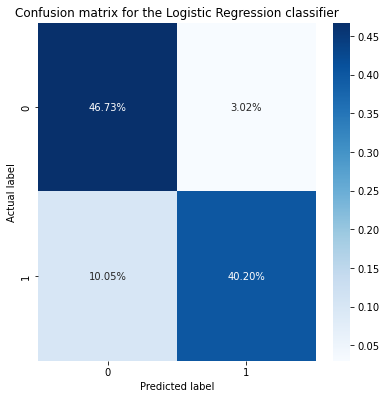

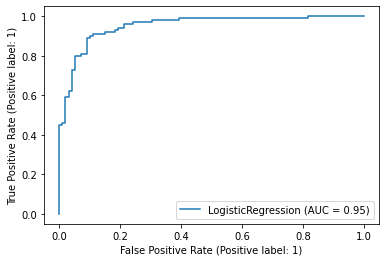

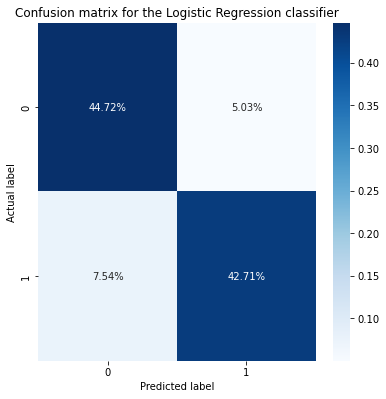

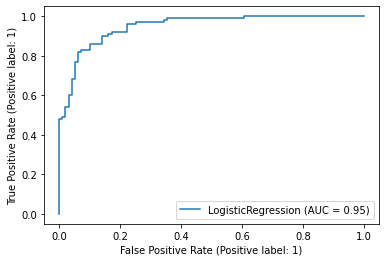

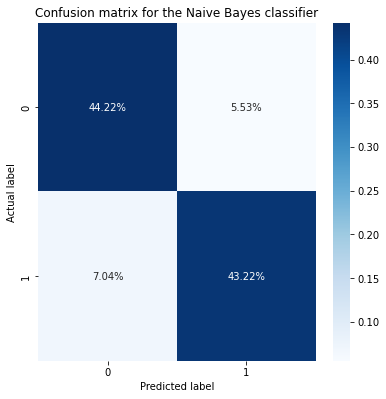

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END

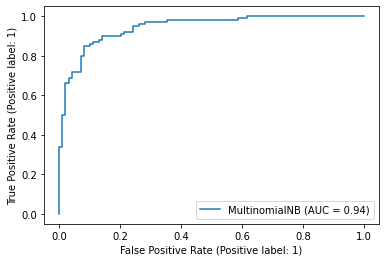

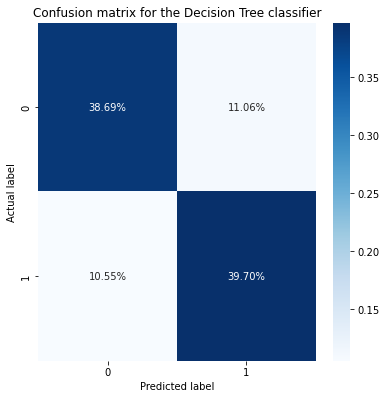

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s


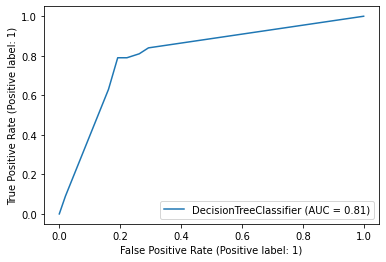

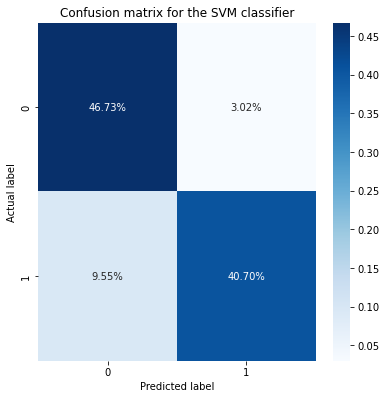

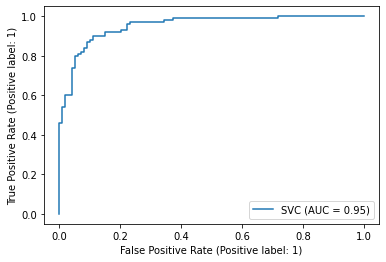

In [ ]:
# 2. data is processed and we consider just the text as input
news_2 = preprocess_text2(news, 'text')
X = news_2.text
data = prepare_data(X)
results2 = get_results(data)

In [ ]:
results2

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.869347,0.930233,0.80,NaN
1,Logistic Regression C=100,0.874372,0.894737,0.85,NaN
2,Naive Bayes,0.874372,0.886598,0.86,NaN
3,Decisional Tree,0.783920,0.782178,0.79,"{'min_samples_split': 2, 'min_samples_leaf': 3..."
4,SVM,0.874372,0.931034,0.81,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


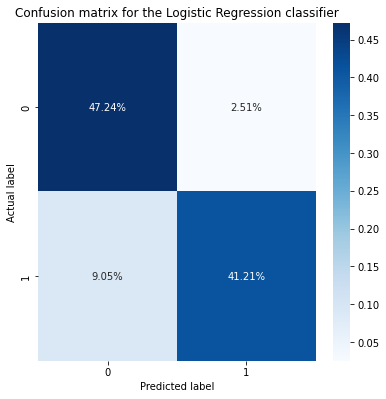

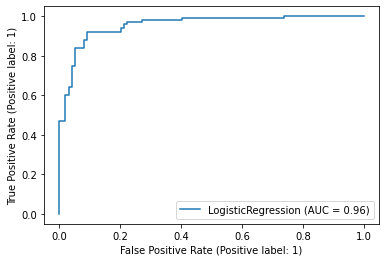

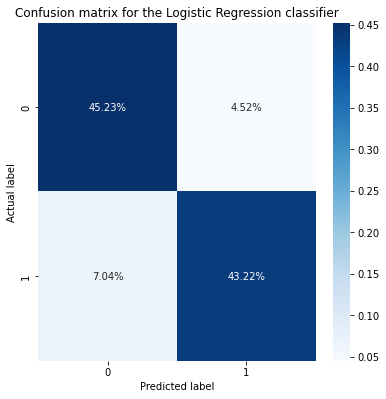

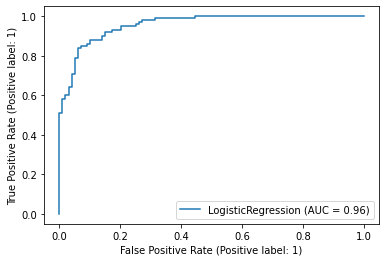

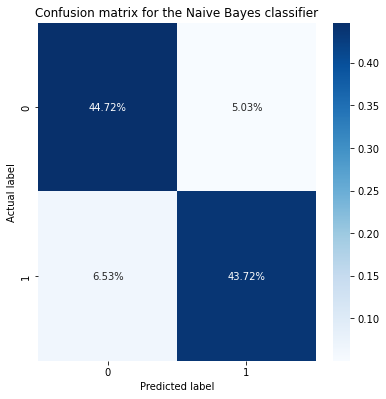

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END

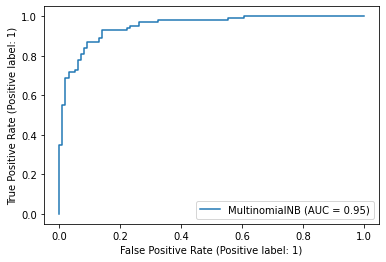

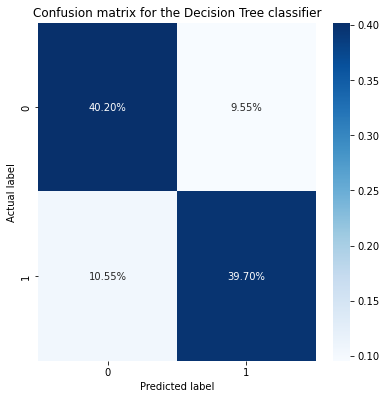

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s


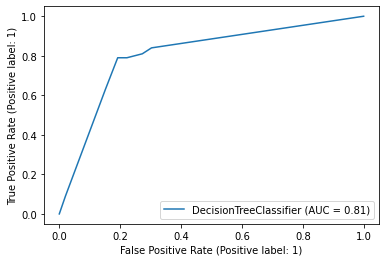

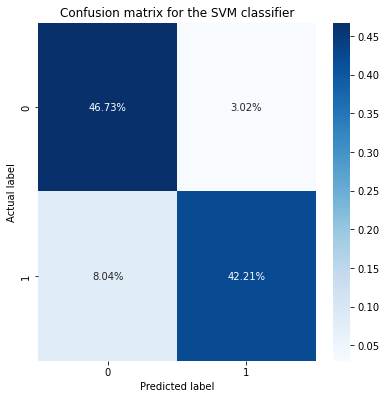

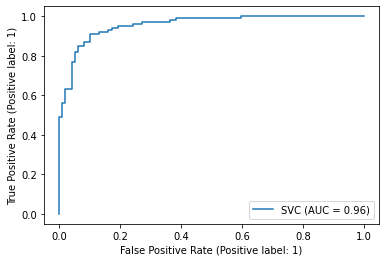

In [ ]:
# 3. data is processed and we consider the text + the author as input
news['text_author'] = news['text'] + ' ' + news['author']
news_2 = preprocess_text2(news, 'text_author')
X = news_2.text_author
data = prepare_data(X)
results3 = get_results(data)

In [ ]:
results3

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.884422,0.942529,0.82,NaN
1,Logistic Regression C=100,0.884422,0.905263,0.86,NaN
2,Naive Bayes,0.884422,0.896907,0.87,NaN
3,Decisional Tree,0.798995,0.806122,0.79,"{'min_samples_split': 2, 'min_samples_leaf': 3..."
4,SVM,0.889447,0.933333,0.84,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


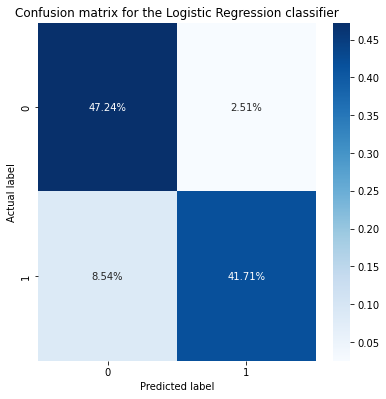

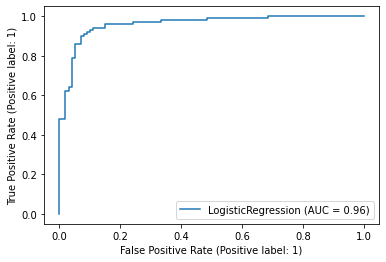

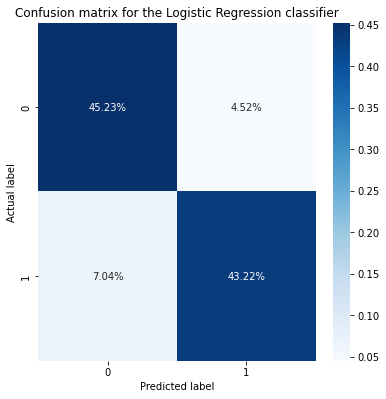

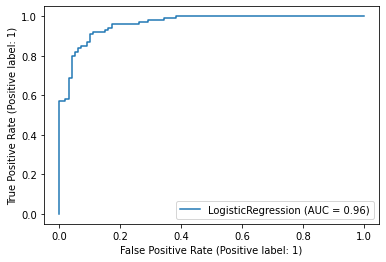

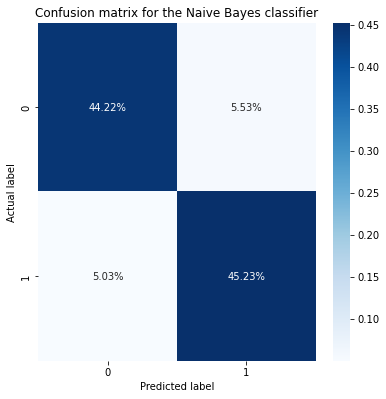

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END

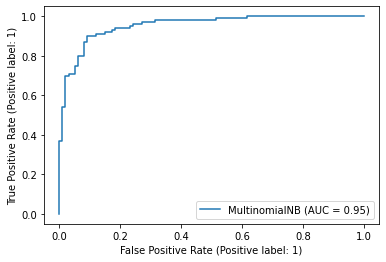

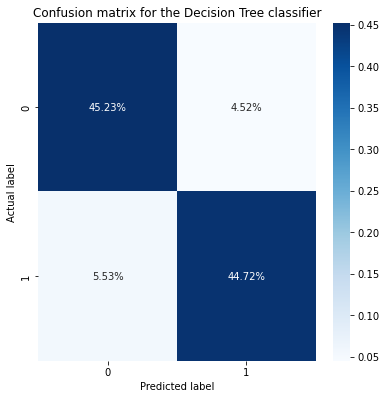

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s


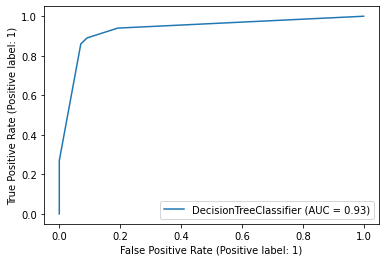

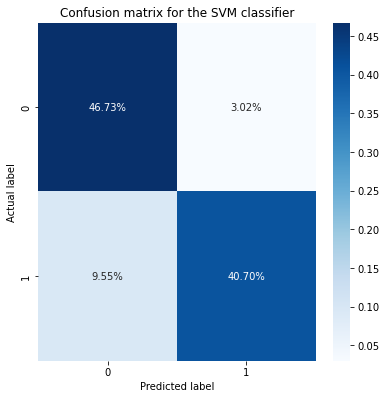

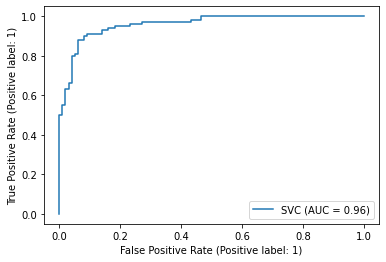

In [ ]:
# 4. data is processed and we consider the text + the author as input
news['text_author_title'] = news['text'] + ' ' + news['author'] + ' ' + news['title']
news_2 = preprocess_text2(news, 'text_author_title')
X = news_2.text_author_title
data = prepare_data(X)
results4 = get_results(data)

In [ ]:
results4

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.889447,0.943182,0.83,NaN
1,Logistic Regression C=100,0.884422,0.905263,0.86,NaN
2,Naive Bayes,0.894472,0.891089,0.90,NaN
3,Decisional Tree,0.899497,0.908163,0.89,"{'min_samples_split': 2, 'min_samples_leaf': 3..."
4,SVM,0.874372,0.931034,0.81,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


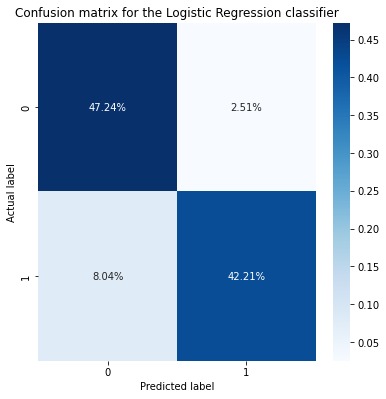

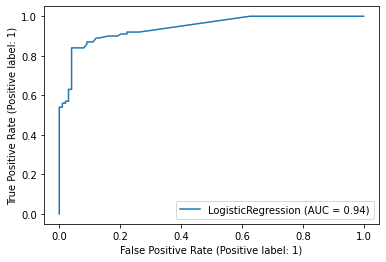

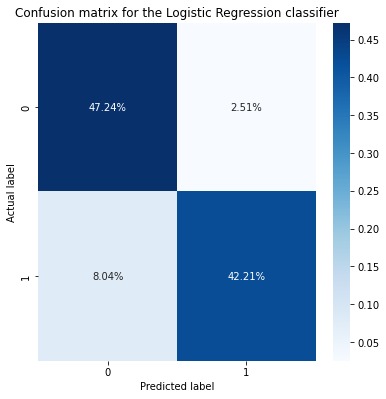

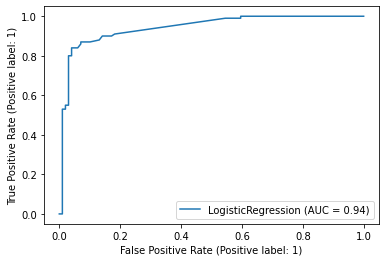

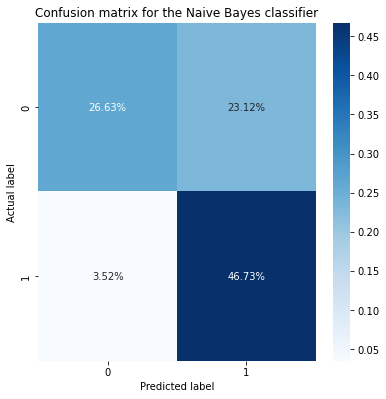

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END

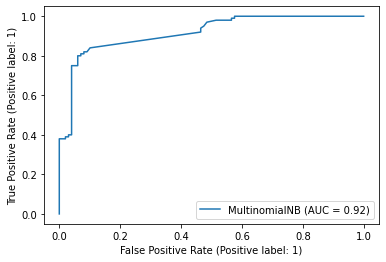

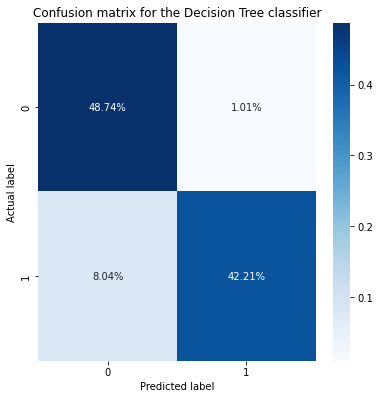

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


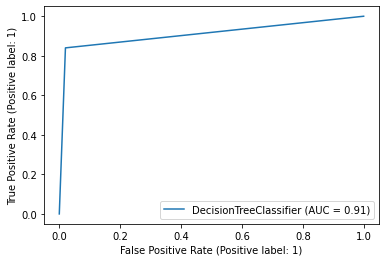

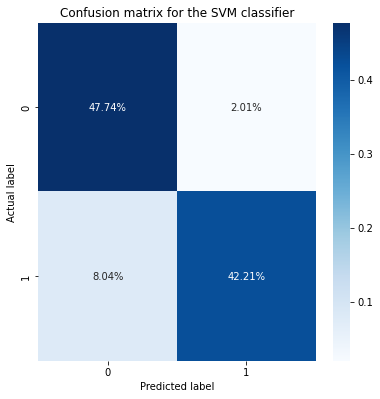

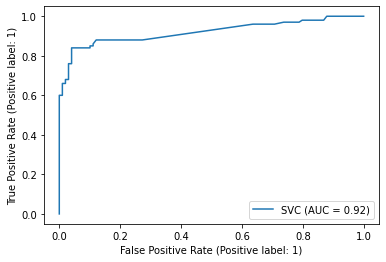

In [ ]:
# 5. data is processed and we consider the title + the author as input
news['author_title'] =  news['author'] + ' ' + news['title']
news_2 = preprocess_text2(news, 'author_title')
X = news_2.author_title
data = prepare_data(X)
results5 = get_results(data)

In [ ]:
results5

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.894472,0.943820,0.84,NaN
1,Logistic Regression C=100,0.894472,0.943820,0.84,NaN
2,Naive Bayes,0.733668,0.669065,0.93,NaN
3,Decisional Tree,0.909548,0.976744,0.84,"{'min_samples_split': 2, 'min_samples_leaf': 3..."
4,SVM,0.899497,0.954545,0.84,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


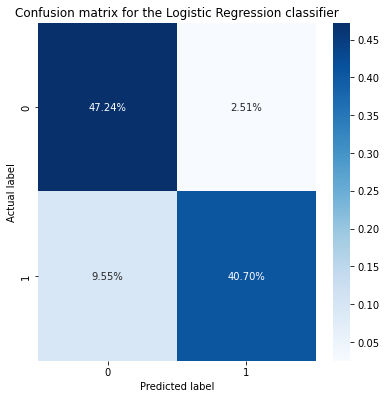

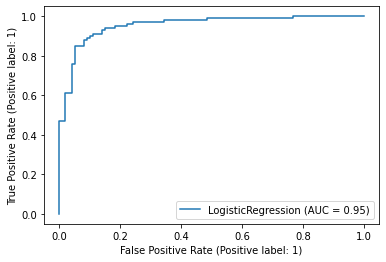

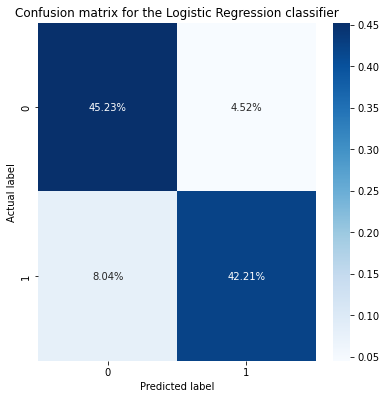

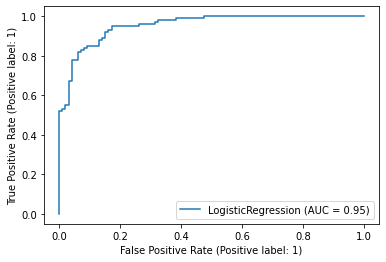

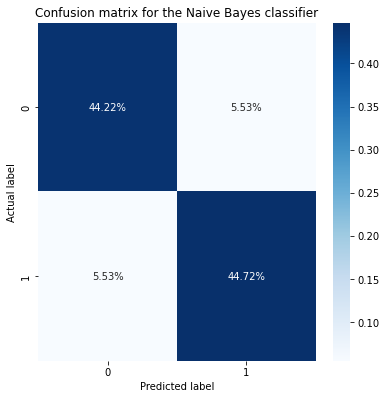

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END

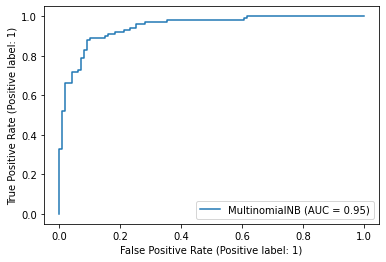

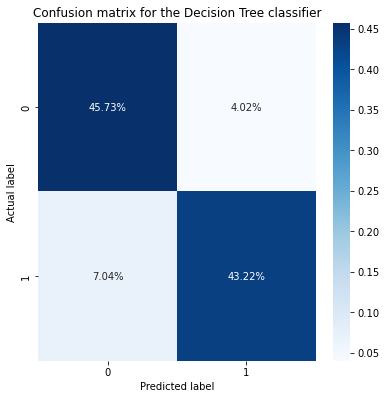

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.6s


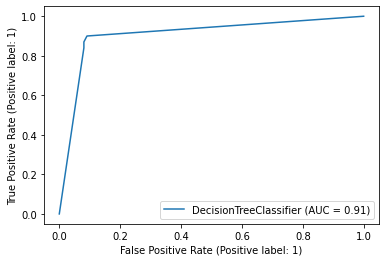

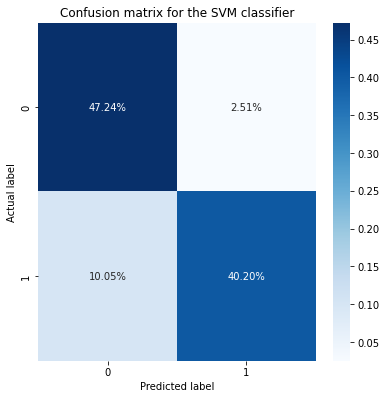

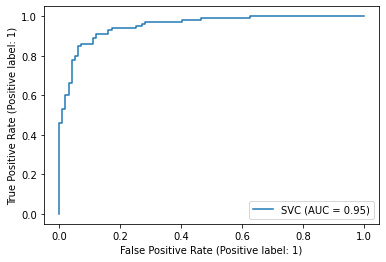

In [ ]:
# 6. data is processed and we consider the title + the text as input
news['title_text'] =  news['title'] + ' ' + news['text']
news_2 = preprocess_text2(news, 'title_text')
X = news_2.title_text
data = prepare_data(X)
results6 = get_results(data)

In [ ]:
results6

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.879397,0.941860,0.81,NaN
1,Logistic Regression C=100,0.874372,0.903226,0.84,NaN
2,Naive Bayes,0.889447,0.890000,0.89,NaN
3,Decisional Tree,0.889447,0.914894,0.86,"{'min_samples_split': 3, 'min_samples_leaf': 4..."
4,SVM,0.874372,0.941176,0.80,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


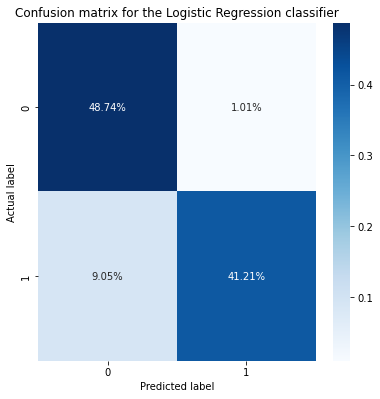

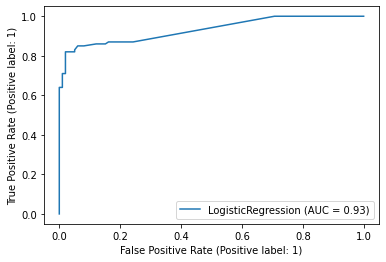

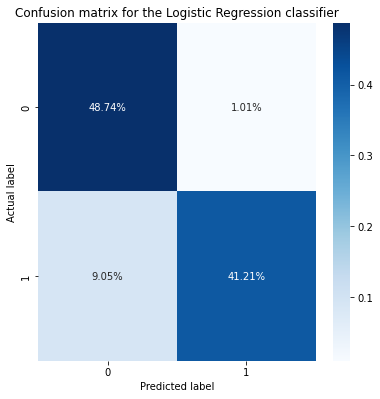

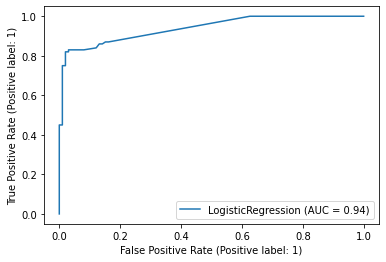

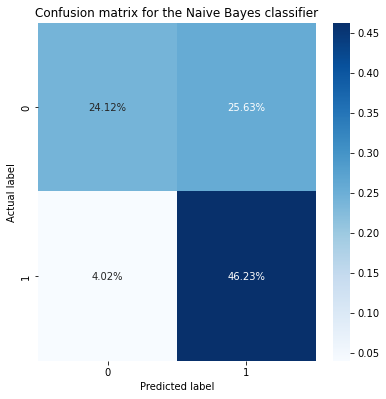

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END ccp_alpha=0.001, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END

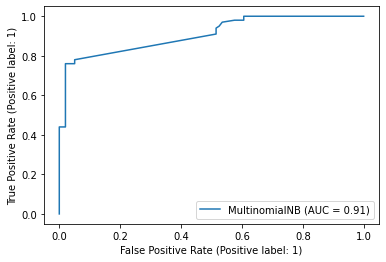

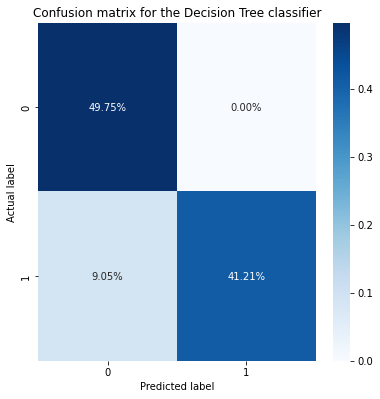

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


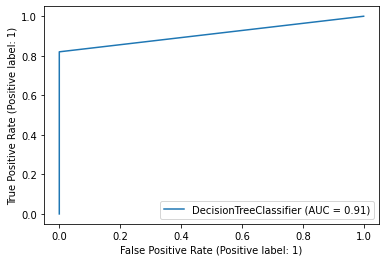

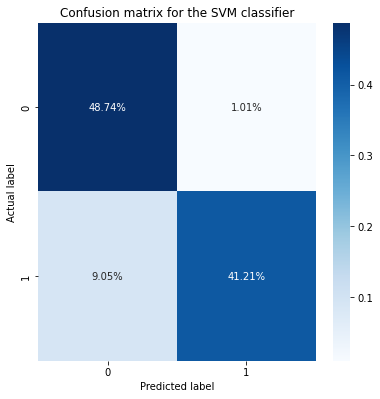

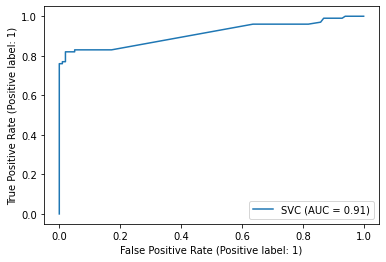

In [ ]:
# 7. data is processed and we consider just the title
news_2 = preprocess_text2(news, 'title')
X = news_2.title
data = prepare_data(X)
results7 = get_results(data)

In [ ]:
results7

,classifier,accuracy,precision,recall,best_params
0,Logistic Regression C=1,0.899497,0.976190,0.82,NaN
1,Logistic Regression C=100,0.899497,0.976190,0.82,NaN
2,Naive Bayes,0.703518,0.643357,0.92,NaN
3,Decisional Tree,0.909548,1.000000,0.82,"{'min_samples_split': 2, 'min_samples_leaf': 3..."
4,SVM,0.899497,0.976190,0.82,"{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}"


# **9. 😀 BERT Model**
BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer-based neural network model that has been shown to be effective in a wide range of natural language processing tasks, including text classification. We will also fine-tune on our dataset.

In [ ]:
df2 = news.copy()

In [ ]:
df2.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
df2.label.unique()

array([0, 1])

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.8 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

----
### For the `author` column:

In [ ]:
# Load your dataset and split it into training and test sets
# df = aux.copy()
texts = df2['author'].values
labels = df2['label'].values
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
# Convert the text data to input format for BERT
train_inputs = tokenizer.batch_encode_plus(
    X_train.tolist(), max_length=100, pad_to_max_length=True,
    return_tensors='pt'
)
test_inputs = tokenizer.batch_encode_plus(
    X_test.tolist(), max_length=100, pad_to_max_length=True,
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Create the DataLoader for training and test
batch_size = 2
train_inputs = train_inputs['input_ids']
train_labels = torch.tensor(y_train)
train_data = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_inputs = test_inputs['input_ids']
test_labels = torch.tensor(y_test)
test_data = TensorDataset(test_inputs, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
# Set the model to run on the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [ ]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for data in train_dataloader:
        input_ids, labels = data
        input_ids = input_ids.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, labels=labels)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}/{num_epochs}, Loss {loss}')

Epoch 1/5, Loss 0.6477231979370117
Epoch 2/5, Loss 0.6774955987930298
Epoch 3/5, Loss 0.52290940284729
Epoch 4/5, Loss 0.39244377613067627
Epoch 5/5, Loss 0.3745802044868469


In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_dataloader:
        input_ids, labels = data
        input_ids = input_ids.to(device)
        labels = labels.to(device)
        outputs = model(input_ids)
        _, predicted = torch.max(outputs.logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total}')

Test Accuracy: 40.0


In [ ]:
# learning rate of the optimizer
learning_rate = optimizer.param_groups[0]['lr']
print(f'Learning rate of the optimizer: {learning_rate}')

# number of epochs
print(f'Number of epochs: {num_epochs}')

# thw batch size
print(f'Batch size: {batch_size}')

# the loss function
print(f'Criterion (loss function): {criterion}')

Learning rate of the optimizer: 0.0003
Number of epochs: 5
Batch size: 2
Criterion (loss function): CrossEntropyLoss()


----
### For the `title` column:

In [ ]:
# Load your dataset and split it into training and test sets
# df = aux.copy()
texts = df2['title'].values
labels = df2['label'].values
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
# Convert the text data to input format for BERT
train_inputs = tokenizer.batch_encode_plus(
    X_train.tolist(), max_length=100, pad_to_max_length=True,
    truncation=True, return_tensors='pt'
)
test_inputs = tokenizer.batch_encode_plus(
    X_test.tolist(), max_length=100, pad_to_max_length=True,
    truncation=True, return_tensors='pt'
)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Create the DataLoader for training and test
batch_size = 32
train_inputs = train_inputs['input_ids']
train_labels = torch.tensor(y_train)
train_data = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_inputs = test_inputs['input_ids']
test_labels = torch.tensor(y_test)
test_data = TensorDataset(test_inputs, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
# Set the model to run on the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [ ]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for data in train_dataloader:
        input_ids, labels = data
        input_ids = input_ids.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, labels=labels)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}/{num_epochs}, Loss {loss}')

Epoch 1/5, Loss 0.7073736786842346
Epoch 2/5, Loss 0.8556749820709229
Epoch 3/5, Loss 0.6807996034622192
Epoch 4/5, Loss 0.6624666452407837
Epoch 5/5, Loss 0.6726670265197754


In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_dataloader:
        input_ids, labels = data
        input_ids = input_ids.to(device)
        labels = labels.to(device)
        outputs = model(input_ids)
        _, predicted = torch.max(outputs.logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total}')

Test Accuracy: 83.22253


In [ ]:
# learning rate of the optimizer
learning_rate = optimizer.param_groups[0]['lr']
print(f'Learning rate of the optimizer: {learning_rate}')

# number of epochs
print(f'Number of epochs: {num_epochs}')

# thw batch size
print(f'Batch size: {batch_size}')

# the loss function
print(f'Criterion (loss function): {criterion}')

Learning rate of the optimizer: 0.0003
Number of epochs: 5
Batch size: 32
Criterion (loss function): CrossEntropyLoss()


The best hyperparameters are: 

- Learning rate of the optimizer: 0.0003

- Number of epochs: 5

- Batch size: 32

- The loss function: CrossEntropyLoss()

For an accuracy of: 83.22%




---


# **10.🚩 Conclusion**
The task of fake news detection is an important and challenging problem, as fake news has become a major issue in today's society. 

Fake news has become a significant concern, particularly with the rise of social media and the ease with which false information can be disseminated. Fake news can take many forms, from misleading headlines to fabricated stories designed to look like legitimate news articles. The impact of fake news can be far-reaching, leading to the spread of misinformation and impacting public opinion. In some cases, fake news has been linked to significant real-world events, such as political upheavals and changes in government policies.

To tackle this problem, we used 18,000 real and fake news articles and preprocessed them by performing tokenization, lowercasing, stemming, removing punctuation and emojis. We then utilized various classification algorithms including logistic regression, naive bayes, SVM and decision tree, and achieved improved performance by incorporating additional features such as article title and author name. Finally, we attempted to use the state-of-the-art BERT model for fake news detection, which has proven to be a powerful tool in natural language processing tasks. Overall, the results from this project demonstrate the effectiveness of using advanced machine learning techniques for fake news detection, and highlight the importance of using multiple techniques and incorporating additional information to improve performance.

There are several future directions for this project: We can incorporate additional information such as news source reliability, social media engagement in order to improve the performance. Also, we can explore other NLP models. For example, we can try to compare the performance of the bert model with other state-of-the-art NLP models, such as Transformer-XL, RoBERTa, and determine the best one for the fake news detection task.

-----
